### Implementación -> Ejemplo: Bombillas encendidas.
_Tenemos 5 bombillas y buscamos la combinación que cumpla las siguientes consideraciones:_

1.  *Solo pueden estar 4 bombillas encendidas.*
2.  *Si la bombilla 1 está encendida, la 3 tiene que estar apagada.*


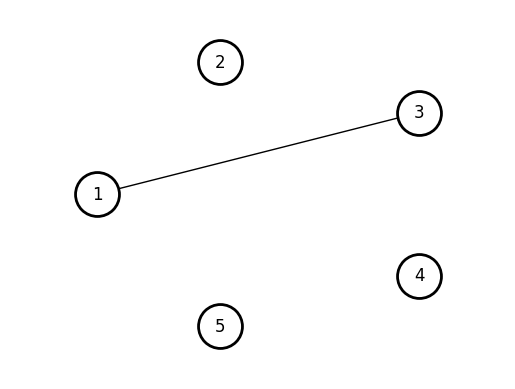

In [1]:
import utils
dic_nodos = {
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
}

dic_aristas = {
    "1": "3",
}

# Crear el grafo
utils.crear_SimpleGrafo_node_weight(dic_nodos, dic_aristas)

Matriz QUBO:
-------------------------
[[-7.  2.  4.  2.  2.]
 [ 0. -7.  2.  2.  2.]
 [ 0.  0. -7.  2.  2.]
 [ 0.  0.  0. -7.  2.]
 [ 0.  0.  0.  0. -7.]]

HAMILTONIANO DEL SISTEMA:
-------------------------
Término lineal: {'x_0': '-7', 'x_1': '-7', 'x_2': '-7', 'x_3': '-7', 'x_4': '-7'}
Términos cuadráticos: {('x_1', 'x_3'): '2', ('x_4', 'x_3'): '2', ('x_4', 'x_1'): '2', ('x_0', 'x_3'): '2', ('x_0', 'x_1'): '2', ('x_0', 'x_4'): '2', ('x_2', 'x_3'): '2', ('x_2', 'x_1'): '2', ('x_2', 'x_4'): '2', ('x_2', 'x_0'): '4'}
Offset: 16.25

RESULTADOS SIMULATED ANNEALING:
-------------------------
DecodedSolution({x_0:0, x_1:1, x_2:1, x_3:1, x_4:1}, energy=0.250000)

Tiempo de ejecución de Simulated Annealing: 0.0083 segundos


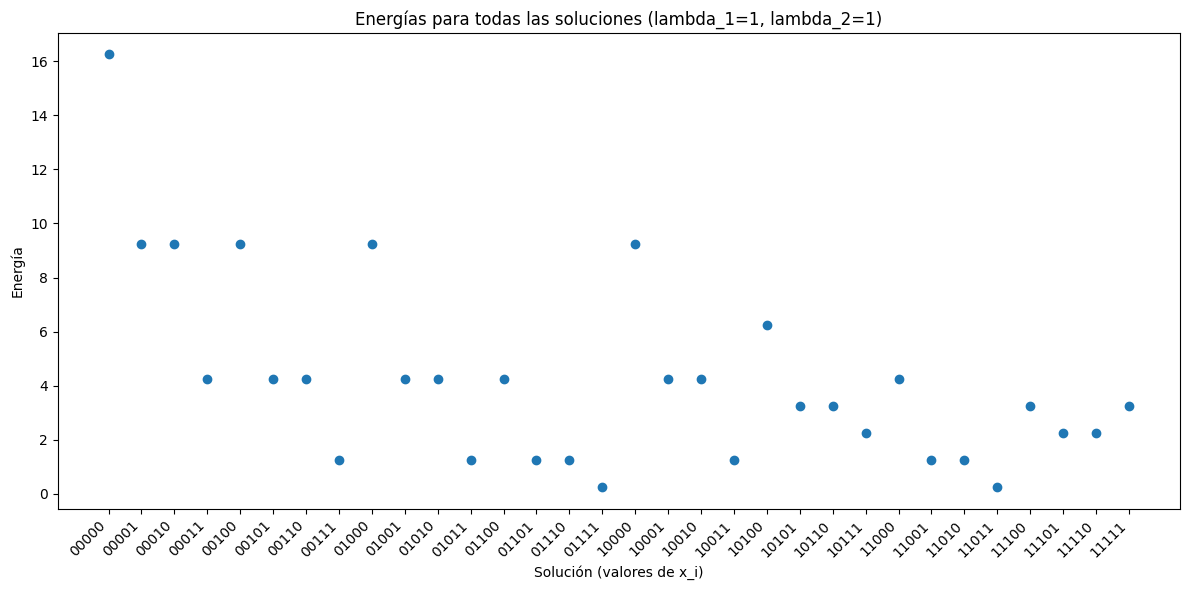

In [2]:
from pyqubo import Binary, Placeholder
import utils

# Definición de variables con Binary de PyQUBO
X = [Binary(f'x_{i}') for i in range(5)] 

# Definir los coeficientes de Lagrange como Placeholders
lambda_1 = Placeholder("lambda_1")
lambda_2 = Placeholder("lambda_2")

H_1R =lambda_1*(sum(X[i] for i in range(len(X)))-4)**2
H_2R = lambda_2*((X[0]+X[2])-0.5)**2

H=  H_1R + H_2R  
# Asignar los valores de las lambdas (antes de compilar)
lambda_dict = {"lambda_1": 1, "lambda_2": 1}

utils.mostrar_matriz_hamiltoniano(H,lambda_dict=lambda_dict, eliminar_bajo_diagonal=True)
utils.ejecucion_simulated_annealing(H, lambda_dict=lambda_dict) 
utils.visualize_energies(H, lambda_dict=lambda_dict)